# I. Gather data

In [157]:
import pandas as pd
import numpy as np
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
pd.options.display.max_colwidth = 600

In [3]:
# Data 1: Enhanced Twitter Archive: extract from text to get rating, dog name, dog stage, 2356 out of 5000+ with non-missing ratings
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [23]:
# Data 2. Image Predictions File
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [12]:
# Data 3. Additional Data via the Twitter API: retweet count and favorite count

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [5]:
df_3 = pd.read_json('tweet_json.txt', lines=True)

# II. Assess Data

### Quality
`Enhanced Twitter Archive` table:  
1. The column, text, includes url.
2. The ratings are not all correct.  
3. The denominator of the ratings should not be 0.  
4. Timestamp is datetime instead of string and the timestamp later than August 1st, 2017 should be removed.
5. This table should only keep original ratings that have images for the future analysis.
6. Dog stages (doggo, floofer, pupper, puppo) might be not all correct.
7. The names are not all correct. 

`Additional Data via the Twitter API` table:  
8. id should be renamed as tweet_id to be consistent with other ids from different tables for the future joining/merging.

### Tidiness  
`Enhanced Twitter Archive` table:  
1. All the dog stages (doggo, floofer, pupper, puppo) should be transposed into one column, dog_stage.  

`Image Predictions File` table:  
2. All p1, p2, p3, p1_cof, p2_cof, p3_cof, p1_dog, p2_dog, and p3_dog should be transposed into p, p_conf, p_dog.          

In [44]:
# Data 1: Enhanced Twitter Archive table
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1864,675362609739206656,NaN,NaN,2015-12-11 17:12:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,None,None,None,None
716,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,None,None,None
1231,713177543487135744,NaN,NaN,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None


In [29]:
df_1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [31]:
df_1['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Toby           7
Buddy          7
Daisy          7
an             7
Oscar          6
Bella          6
Scout          6
Koda           6
Leo            6
Rusty          6
Jax            6
Milo           6
Dave           6
Stanley        6
Jack           6
Larry          5
            ... 
Gin            1
Tycho          1
Murphy         1
Kona           1
Chuq           1
Jameson        1
Terrenth       1
Lilli          1
Godzilla       1
Augie          1
Finnegus       1
Tater          1
Beya           1
Opie           1
Reptar         1
Shnuggles      1
Jarvis         1
Tiger          1
Jeb            1
Tripp          1
Crawford       1
Hector         1
Meatball       1
Rilo           1
Colin          1
Cilantro       1
Jim            1
Kramer        

In [48]:
# Utilities
df_1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
# 2. Data 2: prediction image
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
889,699088579889332224,https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg,1,mousetrap,0.456186,False,banded_gecko,0.258677,False,common_iguana,0.061783,False
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True


In [47]:
# Data 3: Enhanced Twitter Archive table
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2066 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [46]:
df_3.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
79,NaN,NaN,2017-06-21 00:06:44,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 877316816103772164, 'id_str'...",26795,False,Meet Dante. At first he wasn't a fan of his ne...,NaN,...,NaN,NaN,NaN,NaN,5061,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1778,NaN,NaN,2015-12-17 03:26:04,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677328876637302784, 'id_str'...",3747,False,This is Derek. All the dogs adore Derek. He's ...,NaN,...,NaN,NaN,NaN,NaN,1577,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2079,NaN,NaN,2015-11-29 00:39:59,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670764092043436032, 'id_str'...",1084,False,Meet Vincent. He's a wild Adderall Cayenne. Sh...,NaN,...,NaN,NaN,NaN,NaN,431,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
957,NaN,NaN,2016-07-04 22:00:12,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749842022312337408, 'id_str'...",2277,False,This is Spanky. He was a member of the 2002 US...,NaN,...,NaN,NaN,NaN,NaN,579,False,NaN,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1242,NaN,NaN,2016-03-17 02:48:31,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2459,False,This is Oshie. 12/10 please enjoy (vid by @cat...,NaN,...,NaN,NaN,NaN,NaN,781,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [50]:
df_3['favorite_count'].describe()

count      2340.000000
mean       7920.935043
std       12268.701190
min           0.000000
25%        1367.750000
50%        3445.000000
75%        9698.500000
max      163421.000000
Name: favorite_count, dtype: float64

In [52]:
df_3['retweet_count'].describe()

count     2340.000000
mean      2909.469231
std       4901.886194
min          0.000000
25%        584.500000
50%       1359.500000
75%       3391.500000
max      83094.000000
Name: retweet_count, dtype: float64

# III. Clean Data

In [6]:
# Make copies for all datasets
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

### Quality

#### 1. `Enhanced Twitter Archive` table: clean the column, text by removing url.

##### Define  
Remove the string starting 'https' in text column.

##### Code

In [7]:
df1_clean['cleantext'] = df1_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

##### Test

In [8]:
df1_clean['cleantext'].sample(5)

1930                                             This is Kaiya. She's an aspiring shoe model. 12/10 follow your dreams pupper 
144     This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 usually elusive as h*ck 
911                              RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. 
1109                                This is Terry. The harder you hug him the farther his tongue sticks out. 10/10 magical af 
1833                                                                                    This is Bert. He likes flowers. 10/10 
Name: cleantext, dtype: object

#### 2. `Enhanced Twitter Archive` table: the ratings are not all correct.

##### Define  
Check if numerators are larger than 15 and fix the numbers if unreasonable. 
1. Some numbers are partially extracted because they include decimals.  
2. Some texts have more than one foramt, x/x.

In [9]:
df1_clean.query('rating_numerator >= 15')[['cleantext','rating_numerator']]

,cleantext,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs,15
290,@markhoppus 182/10,182
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
433,The floofs have been released I repeat the floofs have been released. 84/70,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,24


##### Code

In [10]:
# 1. The rating_numerators have decimals and are extracted incorrectly. 
sub1 = df1_clean.iloc[[340, 695, 763, 1712]]

In [11]:
newsub = sub1['cleantext'].str.split('/', n=1, expand=True)
newsub

,0,1
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75",10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75",10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27,10 would smile back
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26,10


In [12]:
sub1["numerator"]= newsub[0].str.extract(r'(\d+\.\d+)$', expand=True).astype(float)
sub1 = sub1[['tweet_id','numerator']]
sub1

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,numerator
340,832215909146226688,9.75
695,786709082849828864,9.75
763,778027034220126208,11.27
1712,680494726643068929,11.26


In [13]:
# 2. more than one x/x in the text
sub2 = df1_clean.iloc[[313, 1165, 1202]]

In [14]:
newsub = sub2['cleantext'].str.split('/', n=1, expand=True)
newsub

,0,1
313,@jonnysun @Lin_Manuel ok jomny I know you're excited but 960,"00 isn't a valid rating, 13/10 is tho"
1165,Happy 4,20 from the squad! 13/10 for all
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50,50. Amazed af. 11/10


In [15]:
newsub2 = newsub[1].str.split('/', n=1, expand=True)
newsub2

,0,1
313,"00 isn't a valid rating, 13",10 is tho
1165,20 from the squad! 13,10 for all
1202,50. Amazed af. 11,10


In [16]:
sub2["numerator"]= newsub2[0].str.extract(r'(\d+)$', expand=True).astype(float)
sub2 = sub2[['tweet_id','numerator']]
sub2

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,numerator
313,835246439529840640,13.0
1165,722974582966214656,13.0
1202,716439118184652801,11.0


In [17]:
suball = sub1.append(sub2)
suball

,tweet_id,numerator
340,832215909146226688,9.75
695,786709082849828864,9.75
763,778027034220126208,11.27
1712,680494726643068929,11.26
313,835246439529840640,13.00
1165,722974582966214656,13.00
1202,716439118184652801,11.00


In [18]:
df1_clean2 = pd.merge(df1_clean, suball, on='tweet_id', how='left')

In [19]:
df1_clean2['corrected_numerator'] = df1_clean2['rating_numerator']
df1_clean2['corrected_numerator'][df1_clean2.numerator.notnull()] = df1_clean2['numerator']

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df1_clean2 = df1_clean2.drop(columns='numerator')

##### Test

In [21]:
df1_clean2.iloc[[313, 340, 695, 763, 1202, 1712]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cleantext,corrected_numerator
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.00
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.00
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26


##### Define
Check if denominators are larger than 15 and fix the numbers if unreasonable. 
* Some texts have more than one x/x. The first one is picked up, which is incorrect.

In [22]:
df1_clean2.query('rating_denominator >= 15')[['cleantext','rating_denominator']]

,cleantext,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70,70
902,Why does this never happen at my front door... 165/150,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,170
1165,Happy 4/20 from the squad! 13/10 for all,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once",50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot,50


##### Code

In [23]:
sub3 = df1_clean2.iloc[[313,1165,1202]]

In [24]:
newsub = sub3['cleantext'].str.split('/', n=1, expand=True)
newsub

,0,1
313,@jonnysun @Lin_Manuel ok jomny I know you're excited but 960,"00 isn't a valid rating, 13/10 is tho"
1165,Happy 4,20 from the squad! 13/10 for all
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50,50. Amazed af. 11/10


In [25]:
newsub2 = newsub[1].str.split('/', n=1, expand=True)
newsub2

,0,1
313,"00 isn't a valid rating, 13",10 is tho
1165,20 from the squad! 13,10 for all
1202,50. Amazed af. 11,10


In [26]:
sub3["denominator"]= newsub2[1].str.extract(r'(\d+)', expand=True).astype(float)
sub3 = sub3[['tweet_id','denominator']]
sub3

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,denominator
313,835246439529840640,10.0
1165,722974582966214656,10.0
1202,716439118184652801,10.0


In [27]:
df1_clean3 = pd.merge(df1_clean2, sub3, on='tweet_id', how='left')

In [28]:
df1_clean3['corrected_denominator'] = df1_clean3['rating_denominator']
df1_clean3['corrected_denominator'][df1_clean3.denominator.notnull()] = df1_clean3['denominator']

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
df1_clean3 = df1_clean3.drop(columns='denominator')

##### Test

In [30]:
df1_clean3.iloc[[313,1165,1202]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cleantext,corrected_numerator,corrected_denominator
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,Happy 4/20 from the squad! 13/10 for all,13.0,10
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.0,10


#### 3. `Enhanced Twitter Archive` table: The denominator of the ratings should not be 0.  
##### Define
After correcting the ratings, the denominator, 0, disappear.

##### Test

In [31]:
df1_clean3.query('corrected_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cleantext,corrected_numerator,corrected_denominator


In [32]:
df1_clean3['corrected_denominator'].describe()

count    2356.000000
mean       10.438455
std         6.689475
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: corrected_denominator, dtype: float64

In [33]:
df1_clean3['corrected_numerator'].describe()

count    2356.000000
mean       12.643476
std        41.469543
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: corrected_numerator, dtype: float64

#### 4. `Enhanced Twitter Archive` table: Timestamp is datetime instead of string and the timestamp later than August 1st, 2017 should be removed.

##### Define


In [34]:
df1_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
cleantext                     23

##### Code

In [35]:
# 1. convert string to datetime format
df1_clean3['timestampn'] = pd.to_datetime(df1_clean3['timestamp'])

In [36]:
# 2. extract data before August, 1st, 2017
df1_clean4 = df1_clean3[df1_clean3['timestampn'] <= '2017-08-01']

##### Test

In [37]:
df1_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2 to 2355
Data columns (total 21 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
cleantext                     23

In [38]:
df1_clean4[df1_clean4['timestampn'] >= '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,cleantext,corrected_numerator,corrected_denominator,timestampn


#### 5. Only keep original ratings that have images.
##### Define

##### Code

In [39]:
df1_clean5 = pd.merge(df1_clean4, df2_clean, on='tweet_id', how='inner')

##### Test

In [40]:
df1_clean5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
cleantext                     2073 

#### 6. Dog stages (doggo, floofer, pupper, puppo) are not all correct.
##### Define

In [41]:
df1_clean5['doggo'].value_counts()

None     1993
doggo      80
Name: doggo, dtype: int64

In [42]:
df1_clean5['floofer'].value_counts()

None       2065
floofer       8
Name: floofer, dtype: int64

In [43]:
df1_clean5['pupper'].value_counts()

None      1851
pupper     222
Name: pupper, dtype: int64

In [44]:
df1_clean5['puppo'].value_counts()

None     2049
puppo      24
Name: puppo, dtype: int64

##### Code

In [45]:
# 1. Check dog stage: doggo
df1_clean5['doggo_ck'] = df1_clean5['cleantext'].str.contains('doggo', regex=False)

In [46]:
# 2. Check dog stage: floofer
df1_clean5['floofer_ck'] = df1_clean5['cleantext'].str.contains('floofer', regex=False)

In [47]:
# 3. Check dog stage: pupper 
df1_clean5['pupper_ck'] = df1_clean5['cleantext'].str.contains('pupper', regex=False)

In [48]:
# 4. Check dog stage: pupper 
df1_clean5['puppo_ck'] = df1_clean5['cleantext'].str.contains('puppo', regex=False)

##### Test

In [49]:
df1_clean5.query('doggo == "doggo" & doggo_ck != True')[['cleantext','doggo','doggo_ck']]
# It looks like doggo is generated successfully.

,cleantext,doggo,doggo_ck
354,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,doggo,False
355,RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet,doggo,False
356,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet,doggo,False
357,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,doggo,False
772,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10,doggo,False
811,Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet,doggo,False


In [50]:
df1_clean5.query('floofer == "floofer" & floofer_ck != True')[['cleantext','floofer','floofer_ck']]
# It looks like floofer is generated successfully.

,cleantext,floofer,floofer_ck
159,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs",floofer,False
807,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with,floofer,False
897,Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af,floofer,False
914,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently,floofer,False
1362,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10,floofer,False


In [51]:
df1_clean5.query('puppo == "puppo" & puppo_ck != True')[['cleantext','puppo','puppo_ck']]
# It looks like puppo is generated successfully.

,cleantext,puppo,puppo_ck
62,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth,puppo,False


In [52]:
df1_clean5.query('pupper == "pupper" & pupper_ck != True')[['cleantext','pupper','pupper_ck']]
# It looks like pupper is generated successfully.

,cleantext,pupper,pupper_ck
225,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame,pupper,False
365,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo)",pupper,False
449,Pupper hath acquire enemy. 13/10,pupper,False
613,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,pupper,False
859,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately,pupper,False
1186,HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all,pupper,False
1707,This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10,pupper,False


In [53]:
df1_clean6 = df1_clean5.drop(['doggo_ck', 'floofer_ck', 'pupper_ck', 'puppo_ck'], axis=1)

In [54]:
df1_clean6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
cleantext                     2073 

#### 7. `Enhanced Twitter Archive` table: The names are not all correct.
##### Define
The pattern of the names starts from:  
1. IG:
2. This is: This is 'such', 'a', (it's not a name.) 
3. This... is a
4. Meet 
5. Here's a (need to be fixed)
6. his name is
start from lowercase?  
None  
a  
Bo  
the  
an  
very  
just  
one  
getting  
not  
such  
by  
my  
infuriating  
all  
his  
this  
O  
old  

In [55]:
name = df1_clean6['name'].value_counts().keys().tolist()
name

['None',
 'a',
 'Charlie',
 'Cooper',
 'Oliver',
 'Tucker',
 'Penny',
 'Lucy',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'an',
 'the',
 'Toby',
 'Daisy',
 'Rusty',
 'Jax',
 'Dave',
 'Bella',
 'Bailey',
 'Scout',
 'Koda',
 'Milo',
 'Stanley',
 'Oscar',
 'Buddy',
 'Chester',
 'Louis',
 'Leo',
 'Alfie',
 'Larry',
 'Reggie',
 'Scooter',
 'just',
 'Bear',
 'Oakley',
 'Dexter',
 'George',
 'Sophie',
 'very',
 'Sunny',
 'Bruce',
 'Cassie',
 'Gus',
 'Archie',
 'Walter',
 'Clarence',
 'one',
 'Ruby',
 'Loki',
 'Winnie',
 'Duke',
 'Jerry',
 'Clark',
 'Bentley',
 'Phil',
 'Maggie',
 'Gary',
 'Chip',
 'Jack',
 'Derek',
 'Brody',
 'Finn',
 'Jimothy',
 'Wilson',
 'Sammy',
 'Wyatt',
 'Olive',
 'Max',
 'Wallace',
 'quite',
 'Boomer',
 'Lily',
 'Reese',
 'Steven',
 'Ellie',
 'Hank',
 'Sampson',
 'Paisley',
 'Otis',
 'Beau',
 'Peaches',
 'Kyle',
 'Zoey',
 'Rosie',
 'Moose',
 'Vincent',
 'Jeffrey',
 'Samson',
 'Calvin',
 'Louie',
 'Malcolm',
 'Earl',
 'Riley',
 'Waffles',
 'Gizmo',
 'Maximus',
 'Mia',
 'Ger

In [56]:
array = ['None', 'a', 'Bo', 'the', 'an', 'very', 'just', 'one', 'getting', 'not', 'such', 'by', 'my', 'infuriating', 'all', 'his', 'this', 'o', 'old']
df1_clean7 = df1_clean6.loc[df1_clean6['name'].isin(array)]
df1_clean7[['cleantext','name']]

,cleantext,name
3,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,None
5,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,None
10,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10,None
20,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy),such
22,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo),None
23,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof,None
32,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10,None
36,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales)",None
41,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat",None
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),a


In [57]:
new = df1_clean7['cleantext'].str.split('IG: ', n=1, expand=True)
new

,0,1
3,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (,tucker_marlo) #BarkWeek
5,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,None
10,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10,None
20,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (,roxy.thedoxy)
22,You may not have known you needed to see this today. 13/10 please enjoy (,emmylouroo)
23,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof,None
32,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10,None
36,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (",itselizabethgales)
41,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat",None
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(,puffie_the_chow)


In [58]:
new2 = new[1].str.split(')', n=1, expand=True)
new2

,0,1
3,tucker_marlo,#BarkWeek
5,None,None
10,None,None
20,roxy.thedoxy,
22,emmylouroo,
23,None,None
32,None,None
36,itselizabethgales,
41,None,None
49,puffie_the_chow,


In [59]:
df1_clean7["name2"]= new2[0]
df1_clean8 = df1_clean7[['tweet_id','name2']]
df1_clean8

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,name2
3,891087950875897856,tucker_marlo
5,890729181411237888,None
10,889665388333682689,None
20,887517139158093824,roxy.thedoxy
22,887343217045368832,emmylouroo
23,887101392804085760,None
32,885167619883638784,None
36,884441805382717440,itselizabethgales
41,883117836046086144,None
49,881536004380872706,puffie_the_chow


In [60]:
df1_clean9 = pd.merge(df1_clean6, df1_clean8, on='tweet_id', how='left')

In [61]:
df1_clean9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
cleantext                     2073 

In [62]:
df1_clean9['corrected_name'] = df1_clean9['name']
df1_clean9['corrected_name'][(df1_clean9['name2'] != 'None') & (df1_clean9['name2'].notna())] = df1_clean9['name2']

/Users/jemchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
df1_clean9[(df1_clean9['name2'] != 'None') & (df1_clean9['name2'].notna())][['name','corrected_name','name2']]

,name,corrected_name,name2
3,None,tucker_marlo,tucker_marlo
20,such,roxy.thedoxy,roxy.thedoxy
22,None,emmylouroo,emmylouroo
36,None,itselizabethgales,itselizabethgales
49,a,puffie_the_chow,puffie_the_chow


In [64]:
df1_clean9 = df1_clean9.drop(columns='name2')

#### 8. `Additional Data via the Twitter API` table: id should be renamed as tweet_id to be consistent with other ids from different tables.

#### Define

#### Code

In [65]:
df3_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [66]:
df3_clean2 = df3_clean[['tweet_id','favorite_count','retweet_count']]

#### Test

In [67]:
df3_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Tidiness
#### 1. `Enhanced Twitter Archive` table: All the dog stages (doggo, floofer, pupper, puppo) should be transposed into one column, dog_stage. 
##### Define

##### Code

In [68]:
df1_clean9['doggo'] = df1_clean9['doggo'].str.replace('None','',regex=False)
df1_clean9['floofer'] = df1_clean9['floofer'].str.replace('None','',regex=False)
df1_clean9['pupper'] = df1_clean9['pupper'].str.replace('None','',regex=False)
df1_clean9['puppo'] = df1_clean9['puppo'].str.replace('None','',regex=False)  

In [69]:
df1_clean9['dog_stage'] = (df1_clean9['pupper']+' '+df1_clean9['doggo']+' '+df1_clean9['puppo']+' '+df1_clean9['floofer']).str.strip()

In [70]:
df1_clean9['dog_stage'] = df1_clean9['dog_stage'].str.replace('  ',' ',regex=False) 

In [72]:
df1_clean10 = df1_clean9.drop(columns=['doggo','floofer','pupper','puppo','timestamp','text','name','rating_numerator','rating_denominator','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','jpg_url','img_num'])


In [73]:
df1_clean10 = pd.merge(df1_clean10, df3_clean2, on='tweet_id', how='left')

###### Test

In [74]:
df1_clean10['dog_stage'].value_counts()

                 1752
pupper            211
doggo              67
puppo              23
pupper doggo       11
floofer             7
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

In [75]:
df1_clean10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2073 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2073 non-null object
cleantext                     2073 non-null object
corrected_numerator           2073 non-null float64
corrected_denominator         2073 non-null int64
timestampn                    2073 non-null datetime64[ns, UTC]
corrected_name                2073 non-null object
dog_stage                     2073 non-null object
favorite_count                2065 non-null float64
retweet_count                 2065 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), int64(2), object(6)
memor

#### 2. Image Predictions File table: All p1, p2, p3, p1_cof, p2_cof, p3_cof, p1_dog, p2_dog, and p3_dog should be transposed into p, p_conf, p_dog.

##### Define  
p1, p2, p3, p1_cof, p2_cof, p3_cof, p1_dog, p2_dog and p3_dog are the values instead of column names.

In [76]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True


##### Code

In [78]:
p1 = df2_clean.drop(columns=['p3','p3_conf','p3_dog','p2','p2_conf','p2_dog'])
p1['rank_algorithm'] = 1

In [79]:
p2 = df2_clean.drop(columns=['p1','p1_conf','p1_dog','p3','p3_conf','p3_dog'])
p2['rank_algorithm'] = 2

In [80]:
p3 = df2_clean.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog'])
p3['rank_algorithm'] = 3

In [81]:
p1 = p1.rename(columns = {"p1": "prediction", "p1_conf":"confident", "p1_dog": "breed_dog"}) 
p2 = p2.rename(columns = {"p2": "prediction", "p2_conf":"confident", "p2_dog": "breed_dog"}) 
p3 = p3.rename(columns = {"p3": "prediction", "p3_conf":"confident", "p3_dog": "breed_dog"}) 

In [82]:
df2_clean2 = p1.append(p2, ignore_index = True).append(p3, ignore_index = True) 

##### Test

In [83]:
df2_clean2['rank_algorithm'].value_counts()

3    2075
2    2075
1    2075
Name: rank_algorithm, dtype: int64

In [233]:
df2_clean2['breed_dog'].value_counts()

True     4584
False    1641
Name: breed_dog, dtype: int64

# IV. Store Data

In [444]:
import sqlite3
conn = sqlite3.connect("Twitter.db")

In [445]:
cur = conn.cursor()

In [84]:
twitter_archive_master = df1_clean10

In [446]:
df1_clean10.to_sql("twitter_archive_master", conn, if_exists="replace")

In [85]:
image_predictions_tp = df2_clean2

In [447]:
df2_clean2.to_sql("image_predictions_tp", conn, if_exists="replace")

##### Test

In [455]:
pd.read_sql_query("select * from twitter_archive_master limit 5;", conn)

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,cleantext,corrected_numerator,corrected_denominator,timestampn,corrected_name,dog_stage,favorite_count,retweet_count
0,0,891815181378084864,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,https://twitter.com/dog_rates/status/891815181378084864/photo/1,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,2017-07-31 00:18:03+00:00,Archie,,24470.0,4036.0
1,1,891689557279858688,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,https://twitter.com/dog_rates/status/891689557279858688/photo/1,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,2017-07-30 15:58:51+00:00,Darla,,41181.0,8395.0
2,2,891327558926688256,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10,2017-07-29 16:00:24+00:00,Franklin,,39365.0,9103.0
3,3,891087950875897856,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,https://twitter.com/dog_rates/status/891087950875897856/photo/1,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,13.0,10,2017-07-29 00:08:17+00:00,tucker_marlo,,19787.0,3019.0
4,4,890971913173991426,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",None,None,None,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,13.0,10,2017-07-28 16:27:12+00:00,Jax,,11572.0,1998.0


In [454]:
pd.read_sql_query("select * from image_predictions_tp limit 5;", conn)

,index,tweet_id,jpg_url,img_num,prediction,confident,breed_dog,rank_algorithm
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,1
1,1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,1
2,2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,1
3,3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,1
4,4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,1


# V. Analyze Data & Visualize Data

### 1. What are the characteristics of the most popular dog stage?

### 2. What are the characteristics of the most popular breed?

### 3. Which breed that has highest confidence be caught by neural network model?

In [210]:
# 1. Remove missing stages, the stages that only have one sample size, and outliers
a1 = twitter_archive_master.query('dog_stage !="" & dog_stage != "doggo puppo" & dog_stage != "doggo floofer" & favorite_count <= 60000 & retweet_count <= 40000')
a1['dog_stage'].value_counts()

pupper          210
doggo            64
puppo            22
pupper doggo     11
floofer           7
Name: dog_stage, dtype: int64

In [ ]:
# Check the percentage of removed outliers

In [211]:
a1['corrected_numerator'].describe()

count    314.000000
mean      11.061369
std        1.743899
min        3.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: corrected_numerator, dtype: float64

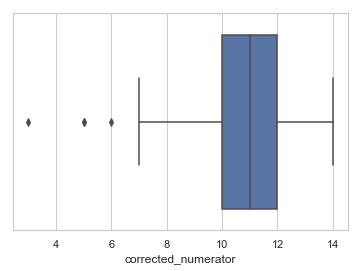

In [213]:
sns.boxplot(x="corrected_numerator", data=a1)

In [214]:
a1.groupby('dog_stage')['corrected_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,64.0,11.906250,1.477006,8.0,11.00,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,210.0,10.672714,1.725933,3.0,10.00,11.0,12.0,14.0
pupper doggo,11.0,11.181818,2.182576,5.0,11.50,12.0,12.0,13.0
puppo,22.0,11.954545,1.290156,9.0,11.25,12.0,13.0,14.0


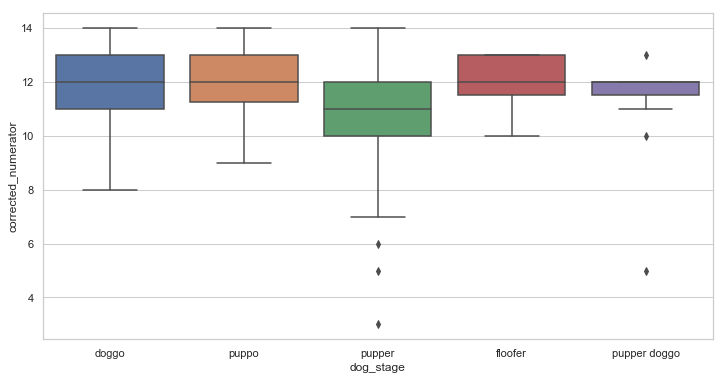

In [215]:
plt.figure(figsize=(12,6))
sns.boxplot(x='dog_stage', y="corrected_numerator", data=a1)

In [216]:
a1['favorite_count'].describe()

count      314.000000
mean      8653.770701
std      10037.097746
min          0.000000
25%       2464.000000
50%       4635.500000
75%      11294.500000
max      54847.000000
Name: favorite_count, dtype: float64

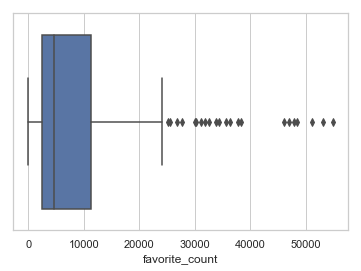

In [217]:
sns.set(style="whitegrid")
sns.boxplot(x="favorite_count", data=a1)

In [218]:
a1.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,64.0,13789.140625,11457.098820,0.0,6243.75,11087.0,17392.00,53099.0
floofer,7.0,12603.142857,10774.668230,2161.0,4769.00,10702.0,17028.00,31765.0
pupper,210.0,6156.342857,7705.820892,0.0,2113.25,2987.5,6972.75,48316.0
pupper doggo,11.0,10590.545455,13969.015430,0.0,5442.50,8309.0,9572.00,51187.0
puppo,22.0,15328.590909,13932.639929,0.0,5894.75,10793.0,18409.75,54847.0


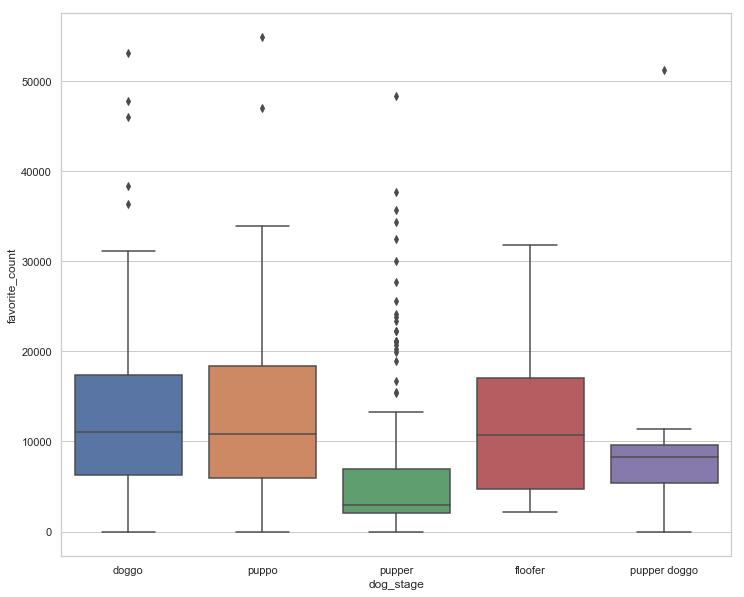

In [219]:
plt.figure(figsize=(12,10))
sns.boxplot(x='dog_stage', y="favorite_count", data=a1)

In [220]:
a1['retweet_count'].describe()

count      314.000000
mean      3096.108280
std       4350.509916
min         78.000000
25%        787.250000
50%       1643.500000
75%       3502.000000
max      39842.000000
Name: retweet_count, dtype: float64

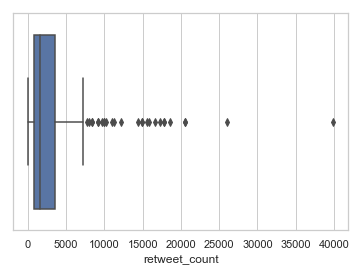

In [221]:
sns.set(style="whitegrid")
sns.boxplot(x="retweet_count", data=a1)

In [222]:
a1.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,64.0,5210.890625,6547.721392,675.0,1919.25,3162.0,5255.25,39842.0
floofer,7.0,4652.285714,5754.108379,467.0,1713.50,3067.0,4163.50,17278.0
pupper,210.0,2163.400000,2849.305214,78.0,643.25,1114.0,2347.00,16661.0
pupper doggo,11.0,5165.454545,6271.362186,1189.0,2158.50,2417.0,3272.00,17782.0
puppo,22.0,4317.318182,4189.777337,659.0,1602.25,2931.5,5119.00,18532.0


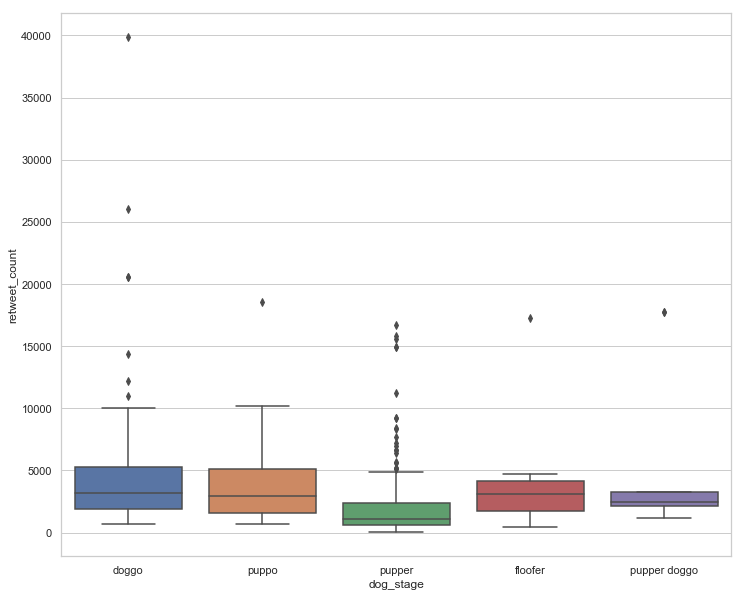

In [223]:
plt.figure(figsize=(12,10))
sns.boxplot(x='dog_stage', y="retweet_count", data=a1)

In [ ]:
# it looks like the popular levels among doggo, puppo and floofer are tight based rating, favorite_count, retweet_count.


In [158]:
# 2. The algorithm's #1 prediction for the image in the tweet and the #1 prediction is a breed of dog
b = image_predictions_tp.query('rank_algorithm == 1 & breed_dog == 1')

In [159]:
b2 = pd.merge(twitter_archive_master, b, on='tweet_id', how='inner')

In [160]:
b2['prediction'].value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       82
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       20
Cardigan                        19
Maltese_dog                     18
beagle                          18
Shetland_sheepdog               18
Eskimo_dog                      18
Rottweiler                      17
Shih-Tzu                        17
Lakeland_terrier                17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_terrier     14
Great_Pyrenees      

In [186]:
# Find out the top 5 breed that has the most images
array = ['golden_retriever','Labrador_retriever','Pembroke','Chihuahua','pug']
b4 = b2.loc[b2['prediction'].isin(array)]

In [187]:
# Remove outliers from corrected_numerator, favorite_count, and retweet_count
b4 = b4.query('corrected_numerator <= 40 & favorite_count <= 60000 & retweet_count <= 20000')

In [188]:
# sample size decreases 
b4['prediction'].value_counts()

golden_retriever      146
Labrador_retriever     93
Pembroke               87
Chihuahua              79
pug                    57
Name: prediction, dtype: int64

In [189]:
b4['corrected_numerator'].describe()

count    462.000000
mean      11.164502
std        1.748565
min        3.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       24.000000
Name: corrected_numerator, dtype: float64

In [190]:
b4.groupby('prediction').corrected_numerator.describe()

,count,mean,std,min,25%,50%,75%,max
prediction,,,,,,,,
Chihuahua,79.0,10.696203,1.963477,3.0,10.0,11.0,12.0,14.0
Labrador_retriever,93.0,11.118280,1.325744,7.0,10.0,11.0,12.0,13.0
Pembroke,87.0,11.425287,1.722844,4.0,11.0,12.0,12.0,14.0
golden_retriever,146.0,11.623288,1.653170,5.0,11.0,12.0,12.0,24.0
pug,57.0,10.315789,1.891314,3.0,10.0,10.0,11.0,13.0


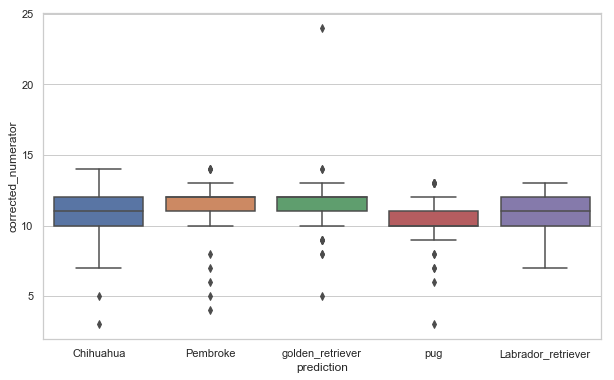

In [193]:
plt.figure(figsize=(10,6))
sns.boxplot(x='prediction', y="corrected_numerator", data=b4)

In [194]:
b4.groupby('prediction')['dog_stage'].value_counts()

prediction          dog_stage   
Chihuahua                            71
                    pupper            7
                    doggo             1
Labrador_retriever                   78
                    pupper            8
                    doggo             4
                    puppo             2
                    pupper doggo      1
Pembroke                             74
                    pupper           10
                    doggo             2
                    puppo             1
golden_retriever                    112
                    pupper           16
                    doggo             9
                    pupper doggo      6
                    puppo             2
                    floofer           1
pug                                  49
                    pupper            8
Name: dog_stage, dtype: int64

In [ ]:
# Calculate precentage?

In [195]:
b4['favorite_count'].describe()

count      462.000000
mean      8771.370130
std       9929.750578
min          0.000000
25%       1914.250000
50%       4259.500000
75%      12667.250000
max      51187.000000
Name: favorite_count, dtype: float64

In [196]:
b4.groupby('prediction')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
prediction,,,,,,,,
Chihuahua,79.0,6502.683544,9030.499068,0.0,1148.0,2713.0,9053.50,37686.0
Labrador_retriever,93.0,8854.860215,9262.511080,0.0,1910.0,5143.0,14385.00,40080.0
Pembroke,87.0,10361.931034,10364.165844,163.0,3066.0,6191.0,14238.00,47010.0
golden_retriever,146.0,10332.349315,10787.950716,0.0,3088.0,6968.0,14713.75,51187.0
pug,57.0,5353.473684,7836.257104,0.0,1432.0,2464.0,5009.00,35151.0


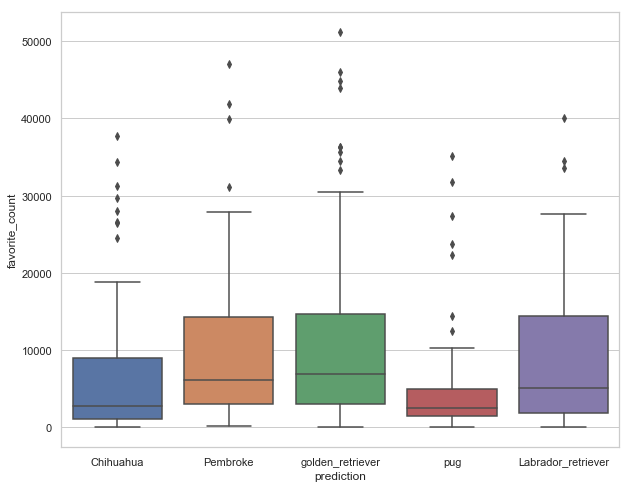

In [198]:
plt.figure(figsize=(10,8))
sns.boxplot(x='prediction', y="favorite_count", data=b4)

In [199]:
b4['retweet_count'].describe()

count      462.000000
mean      2762.216450
std       3046.090809
min         44.000000
25%        662.750000
50%       1595.000000
75%       3760.250000
max      18034.000000
Name: retweet_count, dtype: float64

In [200]:
b4.groupby('prediction')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
prediction,,,,,,,,
Chihuahua,79.0,2127.113924,2916.096288,47.0,487.5,878.0,2629.0,14890.0
Labrador_retriever,93.0,2754.849462,3011.158891,91.0,588.0,1724.0,4159.0,18034.0
Pembroke,87.0,2843.942529,2580.694144,82.0,998.5,1858.0,3757.5,11219.0
golden_retriever,146.0,3418.945205,3508.778471,51.0,1156.0,2274.5,4217.0,17782.0
pug,57.0,1847.578947,2231.989159,44.0,539.0,923.0,2428.0,9659.0


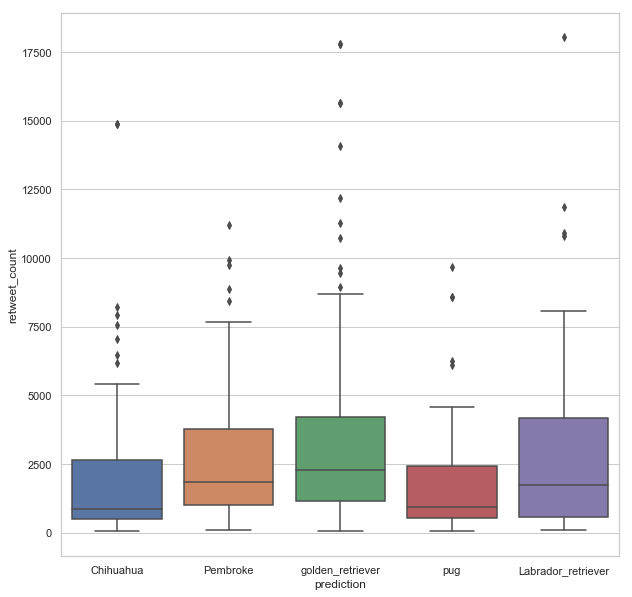

In [224]:
plt.figure(figsize=(10,10))
sns.boxplot(x='prediction', y="retweet_count", data=b4)

In [225]:
# 3. 
c = image_predictions_tp.query('rank_algorithm == 1')
c2 = pd.merge(twitter_archive_master, b, on='tweet_id', how='inner')

In [237]:
c['breed_dog'].value_counts()

True     1532
False     543
Name: breed_dog, dtype: int64

In [226]:
c2.groupby('breed_dog')['confident'].describe()

,count,mean,std,min,25%,50%,75%,max
breed_dog,,,,,,,,
True,1531.0,0.614013,0.259713,0.044333,0.39179,0.614231,0.851069,0.999956


1. Find out if the result is statistically significant (perform one-way ANOVA?)  